In [83]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%autosave 180

Autosaving every 180 seconds


In [84]:
data = pd.read_csv("/Users/aston/Desktop/CU2020Summer/M3/HW3/inpatientCharges.csv")

In [85]:
print(data.shape)
data.head()

(163065, 12)


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [86]:
data.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [87]:
uniquevalues = data['DRG Definition']

In [88]:
data['DRG Definition'].unique()

array(['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC',
       '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC',
       '069 - TRANSIENT ISCHEMIA',
       '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC',
       '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC',
       '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC',
       '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC',
       '101 - SEIZURES W/O MCC', '149 - DYSEQUILIBRIUM',
       '176 - PULMONARY EMBOLISM W/O MCC',
       '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC',
       '189 - PULMONARY EDEMA & RESPIRATORY FAILURE',
       '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC',
       '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC',
       '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC',
       '193 - SIMPLE PNEUMONIA & PLEURISY W MCC',
       '194 - SIMPLE PNEUMONIA & PLEURISY W CC',
       '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC',
       '195 - SIMPLE P

In [89]:
data.groupby('DRG Definition')['Provider Id'].count()

DRG Definition
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                                     1079
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC                          1201
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC                   1659
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC                    2269
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC              1806
                                                                             ... 
885 - PSYCHOSES                                                               613
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC     906
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                                843
918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC                             1382
948 - SIGNS & SYMPTOMS W/O MCC                                               1793
Name: Provider Id, Length: 100, dtype: int64

In [90]:
g1 = data.groupby('DRG Definition')['Provider Id'].nunique()
g1 = pd.DataFrame(g1)
g1.rename(columns={'Provider Id':"Count"})
print(g1.shape)
g1

(100, 1)


,Provider Id
DRG Definition,
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,1201
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,1659
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,2269
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,1806
...,...
885 - PSYCHOSES,613
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC,906
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843


In [91]:
g1.reset_index(inplace = True)
g1

,DRG Definition,Provider Id
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806
...,...,...
95,885 - PSYCHOSES,613
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,906
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1382


In [106]:
g1 = g1.rename(columns={'Provider Id':"Count"})
type(g1)
g1

,DRG Definition,Count
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806
...,...,...
95,885 - PSYCHOSES,613
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,906
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1382


In [121]:
provideridcount = data['Provider Id'].nunique()
g1['Percentage Utilization'] = g1['Count']/data['Provider Id'].nunique()
g1

,DRG Definition,Count,Percentage Utilization
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079,0.323344
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201,0.359904
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659,0.497153
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269,0.679952
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806,0.541205
...,...,...,...
95,885 - PSYCHOSES,613,0.183698
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,906,0.271501
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843,0.252622
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1382,0.414144


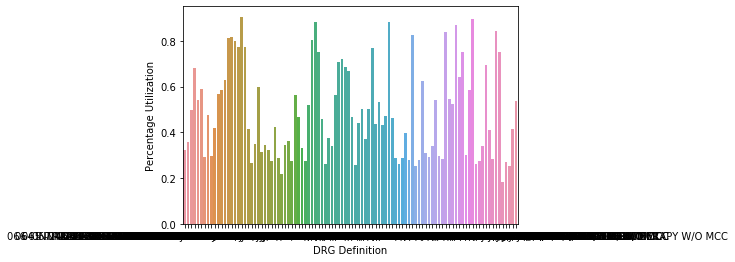

In [122]:
#the utilization of DRG Definition is very random. 
#However, there are many DRG Definition being widely used by over 80% of the physicians.
sns.barplot(x='DRG Definition', y='Percentage Utilization', data=g1, order=None)

In [130]:
#most commonly billed DRG Def is 194- Simple Pneumonia & Pleurisy W CC
g1[g1['Percentage Utilization']>0.8].count()
frequentDRG = g1[g1['Percentage Utilization']>0.8]['DRG Definition'].tolist()
g1[g1['Percentage Utilization']>0.8].sort_values(by='Percentage Utilization', ascending=False)

,DRG Definition,Count,Percentage Utilization
17,194 - SIMPLE PNEUMONIA & PLEURISY W CC,3023,0.905904
86,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,2989,0.895715
39,292 - HEART FAILURE & SHOCK W CC,2953,0.884927
61,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",2950,0.884028
81,"641 - MISC DISORDERS OF NUTRITION,METABOLISM,F...",2899,0.868744
93,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,2812,0.842673
78,603 - CELLULITIS W/O MCC,2807,0.841175
68,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,2750,0.824093
14,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,2720,0.815103
13,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,2713,0.813006


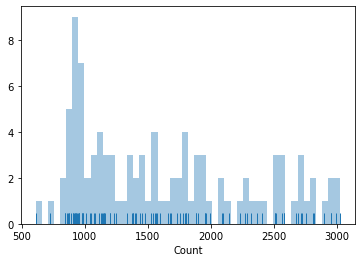